# Inicio: carga y contexto

## Carga de Dataset (y análisis rápido)

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv("/content/drive/My Drive/partidos.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset.head()
# Muestra las primeras 5 filas del Dataset

,temporada,semana,dia,fecha,hora,local,visitante,sedes,arbitro,resultado,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
0,2016-2017,1,Vie,2016-08-26,19:00,Sarmiento,Arsenal,Estadio Eva Peron de Junín,Ariel Penel,local,...,1,16,15,0,21,11,19,0,0,0
1,2016-2017,1,Sáb,2016-08-27,14:00,Gimnasia ELP,Vélez Sarsf,Estadio Juan Carmelo Zerillo,Silvio Trucco,local,...,1,22,13,0,32,18,18,0,0,0
2,2016-2017,1,Sáb,2016-08-27,16:00,Rosario Cent,Defensa y Just,Estadio Dr. Lisandro de la Torre,Mauro Vigliano,empate,...,0,21,18,1,8,26,26,0,0,0
3,2016-2017,1,Sáb,2016-08-27,18:00,Racing Club,Talleres,Estadio Presidente Juan Domingo Perón,Sergio Pezzotta,local,...,0,20,17,2,19,22,24,0,0,0
4,2016-2017,1,Sáb,2016-08-27,19:00,Tucumán,Rafaela,Estadio Monumental Presidente José Fierr...,Facundo Tello,local,...,0,19,12,2,24,16,27,0,0,0


In [ ]:
dataset.tail()
# Muestra las últimas 5 filas del Dataset

,temporada,semana,dia,fecha,hora,local,visitante,sedes,arbitro,resultado,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
2127,2022,27,Lun,2022-10-24,15:30,Barracas Central,Newell's OB,Estadio Claudio Fabián Tapia,Luis Lobo Medina,empate,...,0,11,11,1,27,16,5,0,30,36
2128,2022,27,Lun,2022-10-24,16:30,Rosario Cent,Colón,Estadio Dr. Lisandro de la Torre,Franco Acita,empate,...,0,8,7,7,8,15,10,0,33,28
2129,2022,27,Lun,2022-10-24,20:30,Tigre,Arsenal,Estadio José Dellagiovanna,Patricio Loustau,visitante,...,0,6,8,1,8,10,20,0,43,31
2130,2022,19,Mar,2022-10-25,19:00,Vélez Sarsf,CC Córdoba,Estadio José Amalfitani,Fernando Espinoza,local,...,0,0,0,0,0,0,0,0,12,21
2131,2022,27,Mar,2022-10-25,20:00,Platense,Lanús,Estadio Ciudad de Vicente López,Néstor Pitana,empate,...,0,15,14,1,14,11,7,0,34,20


In [ ]:
dataset.describe()
# Muestra datos y estadísticas básicas del Dataset (conteo, promedio, desv. estándar, valor min, primer, segundo y tercer cuartil, valor máx.)

,semana,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,local_goles_penal,local_penales,local_disparos,local_disparos_puerta,...,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,local_puntos_acumulados_temporada,visitante_puntos_acumulados_temporada
count,2132.000000,2129.000000,2129.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,13.752814,0.519582,0.481372,1.245310,0.967167,0.848968,0.138368,0.183865,13.580206,4.418856,...,0.175422,14.051595,12.744841,1.892120,16.828330,13.144465,14.119137,0.033302,17.165572,17.343809
std,7.754950,0.107410,0.107337,1.103449,1.028387,0.932083,0.367740,0.426660,4.691580,2.258823,...,0.422497,4.168907,3.976066,1.627311,6.916583,4.504000,5.657258,0.182062,12.104475,11.996226
min,1.000000,0.210000,0.180000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.440000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.000000,...,0.000000,11.000000,10.000000,1.000000,12.000000,10.000000,10.000000,0.000000,7.000000,7.000000
50%,14.000000,0.520000,0.480000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000,4.000000,...,0.000000,14.000000,13.000000,2.000000,16.000000,13.000000,14.000000,0.000000,16.000000,16.000000
75%,20.000000,0.600000,0.560000,2.000000,2.000000,1.000000,0.000000,0.000000,17.000000,6.000000,...,0.000000,17.000000,15.000000,3.000000,21.000000,16.000000,18.000000,0.000000,25.000000,25.250000
max,30.000000,0.820000,0.790000,8.000000,6.000000,7.000000,3.000000,3.000000,35.000000,13.000000,...,3.000000,33.000000,27.000000,12.000000,44.000000,32.000000,37.000000,2.000000,62.000000,59.000000


In [ ]:
dataset.columns
# Muestra los encabezados de las columnas del Dataset

Index(['temporada', 'semana', 'dia', 'fecha', 'hora', 'local', 'visitante',
       'sedes', 'arbitro', 'resultado', 'local_posesion', 'visitante_posesion',
       'local_goles', 'visitante_goles', 'local_asistencias',
       'local_goles_penal', 'local_penales', 'local_disparos',
       'local_disparos_puerta', 'local_amarillas', 'local_rojas',
       'local_faltas_cometidas', 'local_faltas_recibidas',
       'local_posiciones_adelantedas', 'local_pases_cruzados',
       'local_derribos', 'local_intercepciones', 'local_goles_contra',
       'visitante_asistencias', 'visitante_goles_penal', 'visitante_penales',
       'visitante_disparos', 'visitante_disparos_puerta',
       'visitante_amarillas', 'visitante_rojas', 'visitante_faltas_cometidas',
       'visitante_faltas_recibidas', 'visitante_posiciones_adelantedas',
       'visitante_pases_cruzados', 'visitante_derribos',
       'visitante_intercepciones', 'visitante_goles_contra',
       'local_puntos_acumulados_temporada',
       'vi

In [ ]:
dataset.info()
# Muestra info. de las columnas del Dataset (índice, encabezado, cant. filas no nulas, tipo de dato)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   temporada                              2132 non-null   object 
 1   semana                                 2132 non-null   int64  
 2   dia                                    2132 non-null   object 
 3   fecha                                  2132 non-null   object 
 4   hora                                   2132 non-null   object 
 5   local                                  2132 non-null   object 
 6   visitante                              2132 non-null   object 
 7   sedes                                  2132 non-null   object 
 8   arbitro                                2132 non-null   object 
 9   resultado                              2132 non-null   object 
 10  local_posesion                         2129 non-null   float64
 11  visi

## Diccionario


- Temporada: indica el/los años en que se jugó el torneo.
- Semana: semana del torneo en que se jugó el partido.
- Día: día (en palabras) de la semana en que se jugó el partido.
- Fecha: fecha completa (día/mes/año) en que se jugó el partido.
- Hora: hora (formato 24 hs.) en que se jugó el partido.
- Local: equipo que jugó como local el partido (en su cancha).
- Visitante: equipo que jugó como visitante el partido.
- Sedes: nombre del estadio en que se jugó el partido.
- Árbitro: nombre completo del árbitro principal del partido.
- Resultado: descripción de cómo salió el partido según quién ganó o empate ('Local'/'Visitante'/'Empate').

---

Para cada una de las siguientes columnas, en el dataset se hace distinción del mismo atributo pero según "local" o "visitante" (por ej. local_goles y visitante_goles). Se realizará un resúmen en el que cada atributo se explicará una única vez, eliminando las repeticiones derivadas de su distinción entre "local" y "visitante" que representarán "x", para agilizar la explicación:

- x_posesion: porcentaje de posesión de pelota del equipo x.
- x_goles: goles en el partido del equipo x.
- x_asistencias: asistencias de gol en el partido del equipo x.
- x_goles_penal: cantidad de goles que convirtió de penal en el partido el equipo x.
- x_penales: cantidad de penales otorgados en el partido al equipo x.
- x_disparos: cantidad de tiros en ataque en el partido del equipo x.
- x_disparos_puerta: cantidad de tiros al arco en el partido del equipo x.
- x_amarillas: cantidad de tarjetas amarillas recibidas en el partido por el equipo x.
- x_rojas: cantidad de tarjetas rojas recibidas en el partido por el equipo x.
- x_faltas_cometidas: cantidad de faltas cometidas en el partido por el equipo x.
- x_faltas_recibidas: cantidad de faltas recibidas en el partido por el equipo x.
- x_posiciones_adelantadas: cantidad de posiciones adelantadas en el partido por el equipo x.
- x_pases_cruzados: cantidad de pases cruzados (cambios de frente) en el partido por el equipo x.
- x_derribos: cantidad de derribos dados en el partido por el equipo x.
- x_intercepciones: cantidad de recuperaciones de pelota en el partido por el equipo x.
- x_goles_contra: cantidad de goles en contra otorgados en el partido por el equipo x.
- x_puntos_acumulados: total de puntos acumulados en el torneo hasta ese partido por el equipo x.

## Contexto del tópico elegido

*Tópico elegido:* Deportes, específicamente **Fútbol**.

*Descripción del Dataset:* se importa un dataset (https://www.kaggle.com/datasets/nicolsvrancovich/argentina-first-division-matches-since-2016) de la **Liga Profesional 2016-2022**, torneo de fútbol profesional de Argentina. En el mismo, se describen los partidos de cada torneo en esos años, con detalles como: equipos que participaron en cada uno, goles, resultado, sede, árbitro, y otros datos específicos del encuentro para cada equipo.

*Contexto e interés de investigación:* reside en la creciente orientación del deporte hacia la estadística y los datos, teniendo en cuenta la corriente de optimización del rendimiento de los jugadores, deportistas y equipos a través del estudio de cada reacción física calculada, colección de métricas de las actuaciones en los partidos o eventos y entrenamientos, entre otras técnicas modernas y tecnológicas del deporte actual.

*Objetivo:* inferir  y predecir sobre los atributos que más influyen en la victoria de los equipos; teniendo en cuenta la posesión, faltas cometidas, disparos (en ataque y al arco), tarjetas, etc. buscando patrones en los partidos finalizados.

# Limpieza de datos

###Eliminación de columnas

In [ ]:
dataset.columns
# Muestra los encabezados de las columnas del Dataset

Index(['temporada', 'semana', 'dia', 'fecha', 'hora', 'local', 'visitante',
       'sedes', 'arbitro', 'resultado', 'local_posesion', 'visitante_posesion',
       'local_goles', 'visitante_goles', 'local_asistencias',
       'local_goles_penal', 'local_penales', 'local_disparos',
       'local_disparos_puerta', 'local_amarillas', 'local_rojas',
       'local_faltas_cometidas', 'local_faltas_recibidas',
       'local_posiciones_adelantedas', 'local_pases_cruzados',
       'local_derribos', 'local_intercepciones', 'local_goles_contra',
       'visitante_asistencias', 'visitante_goles_penal', 'visitante_penales',
       'visitante_disparos', 'visitante_disparos_puerta',
       'visitante_amarillas', 'visitante_rojas', 'visitante_faltas_cometidas',
       'visitante_faltas_recibidas', 'visitante_posiciones_adelantedas',
       'visitante_pases_cruzados', 'visitante_derribos',
       'visitante_intercepciones', 'visitante_goles_contra',
       'local_puntos_acumulados_temporada',
       'vi

Los datos de semana, dia, fecha, hora y sedes de los partidos no son relevantes para el objetivo, por lo que serán eliminados en primera instancia. Así también, los datos de cómo venían los equipos en la temporada.

In [ ]:
dataset1 = dataset.drop(columns=['semana','dia','fecha','hora', 'sedes', 'local_puntos_acumulados_temporada', 'visitante_puntos_acumulados_temporada'])

In [ ]:
dataset1.columns

Index(['temporada', 'local', 'visitante', 'arbitro', 'resultado',
       'local_posesion', 'visitante_posesion', 'local_goles',
       'visitante_goles', 'local_asistencias', 'local_goles_penal',
       'local_penales', 'local_disparos', 'local_disparos_puerta',
       'local_amarillas', 'local_rojas', 'local_faltas_cometidas',
       'local_faltas_recibidas', 'local_posiciones_adelantedas',
       'local_pases_cruzados', 'local_derribos', 'local_intercepciones',
       'local_goles_contra', 'visitante_asistencias', 'visitante_goles_penal',
       'visitante_penales', 'visitante_disparos', 'visitante_disparos_puerta',
       'visitante_amarillas', 'visitante_rojas', 'visitante_faltas_cometidas',
       'visitante_faltas_recibidas', 'visitante_posiciones_adelantedas',
       'visitante_pases_cruzados', 'visitante_derribos',
       'visitante_intercepciones', 'visitante_goles_contra'],
      dtype='object')

### Manejo de duplicados


In [ ]:
dataset1.duplicated().sum()
# Muestra la cantidad de filas duplicadas del Dataset

0

No se encontraron filas duplicadas, por lo que no se continúa con este procedimiento.

### Cambio de formatos

In [ ]:
dataset1.info()
# Brinda info. del Dataset; cant. de filas y columnas, cant. filas no nulas, tipo de variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temporada                         2132 non-null   object 
 1   local                             2132 non-null   object 
 2   visitante                         2132 non-null   object 
 3   arbitro                           2132 non-null   object 
 4   resultado                         2132 non-null   object 
 5   local_posesion                    2129 non-null   float64
 6   visitante_posesion                2129 non-null   float64
 7   local_goles                       2132 non-null   int64  
 8   visitante_goles                   2132 non-null   int64  
 9   local_asistencias                 2132 non-null   int64  
 10  local_goles_penal                 2132 non-null   int64  
 11  local_penales                     2132 non-null   int64  
 12  local_

No se considera necesario el cambio de formato para ninguna de las columnas, no se continúa con este procedimiento.

### Manejo de datos faltantes/nulos

In [ ]:
dataset1.isnull().sum()
# Muestra la cantidad de valores nulos en las filas para cada columna del Dataset

,0
temporada,0
local,0
visitante,0
arbitro,0
resultado,0
local_posesion,3
visitante_posesion,3
local_goles,0
visitante_goles,0
local_asistencias,0


En este contexto, esta función da todo 0, excepto para las columnas "local_posesion" y "visitante_posesion", donde muestra el valor 3. Esto indica que para tres filas, estas columnas no contienen valores. Se procede a ver cuáles son esas filas.

In [ ]:
null_rows = dataset1[dataset1['local_posesion'].isnull() | dataset1['visitante_posesion'].isnull()]
null_rows
# Muestra las filas para las columnas que se detectaron con nulos del Dataset
# con dataset1.isnull().sum()

,temporada,local,visitante,arbitro,resultado,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,...,visitante_disparos_puerta,visitante_amarillas,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra
784,2017-2018,Independiente,Defensa y Just,Hernán Mastrángelo,visitante,NaN,NaN,0,1,0,...,0,4,0,0,0,0,0,0,0,0
1882,2022,Independiente,Tucumán,Fernando Echenique,visitante,NaN,NaN,0,1,0,...,0,2,0,0,0,0,0,0,0,0
2130,2022,Vélez Sarsf,CC Córdoba,Fernando Espinoza,local,NaN,NaN,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dataset1[['local_posesion', 'visitante_posesion']].describe()
# Brinda info. sobre las columnas elegidas

,local_posesion,visitante_posesion
count,2129.000000,2129.000000
mean,0.519582,0.481372
std,0.107410,0.107337
min,0.210000,0.180000
25%,0.440000,0.410000
50%,0.520000,0.480000
75%,0.600000,0.560000
max,0.820000,0.790000


Observando en el describe() anterior, como la media y la mediana son similares, se decide imputar por *media* para los valores faltantes.



In [ ]:
for column in ['local_posesion', 'visitante_posesion']:
    mean_value = dataset1[column].mean()
    dataset1[column].fillna(mean_value, inplace=True)
# Imputar valores faltantes con la media de cada columna

<ipython-input-192-85b9e4c248e7>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Finalmente, se hace un print() para evaluar si efectivamente en esas filas con datos faltantes, ahora se muestran los valores imputados.

In [ ]:
print(dataset1.iloc[[784, 1882, 2130]])

      temporada          local       visitante             arbitro  resultado  \
784   2017-2018  Independiente  Defensa y Just  Hernán Mastrángelo  visitante   
1882       2022  Independiente         Tucumán  Fernando Echenique  visitante   
2130       2022    Vélez Sarsf      CC Córdoba   Fernando Espinoza      local   

      local_posesion  visitante_posesion  local_goles  visitante_goles  \
784         0.519582            0.481372            0                1   
1882        0.519582            0.481372            0                1   
2130        0.519582            0.481372            3                1   

      local_asistencias  ...  visitante_disparos_puerta  visitante_amarillas  \
784                   0  ...                          0                    4   
1882                  0  ...                          0                    2   
2130                  2  ...                          0                    0   

      visitante_rojas  visitante_faltas_cometidas  visita

### Manejo de outliers

Se detectan los outliers de cada columna, y se eliminan aquellas filas donde los mismos no cumplan con los cálculos.

In [ ]:
numerical_cols = dataset1.select_dtypes(include=['number']).columns
for col in numerical_cols:
    # Calculate Q1, Q3, and IQR
    Q1 = dataset1[col].quantile(0.25)
    Q3 = dataset1[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and remove outliers
    dataset1 = dataset1[~((dataset1[col] < lower_bound) | (dataset1[col] > upper_bound))]

# Reset the index after removing rows
dataset1 = dataset1.reset_index(drop=True)


In [ ]:
datasetlimpio = dataset1
datasetlimpio

,temporada,local,visitante,arbitro,resultado,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,...,visitante_disparos_puerta,visitante_amarillas,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra
0,2016-2017,Rosario Cent,Defensa y Just,Mauro Vigliano,empate,0.64,0.36,0,0,0,...,1,3,0,21,18,1,8,26,26,0
1,2016-2017,Godoy Cruz,CA Huracán,Federico Beligoy,local,0.39,0.61,1,0,1,...,4,4,0,14,18,3,16,17,19,0
2,2016-2017,Tigre,Estudiantes,Darío Herrera,visitante,0.39,0.62,0,3,0,...,7,1,0,15,13,0,23,18,18,0
3,2016-2017,CA Unión,Club Olimpo,Mariano González,local,0.45,0.55,1,0,1,...,1,4,0,16,13,4,17,22,18,0
4,2016-2017,River Plate,Banfield,Fernando Rapallini,local,0.71,0.29,4,1,1,...,2,3,0,17,13,2,10,17,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,2022,San Lorenzo,Aldosivi,Ariel Penel,local,0.49,0.51,3,0,2,...,5,1,0,7,6,0,6,10,11,0
764,2022,Argentinos Jun,Vélez Sarsf,Facundo Tello,local,0.47,0.53,2,0,2,...,3,1,0,10,11,1,21,16,14,0
765,2022,Banfield,Sarmiento,Pablo Giménez,empate,0.60,0.40,0,0,0,...,2,2,0,14,10,1,15,11,11,0
766,2022,Talleres,Gimnasia ELP,Nicolás Lamolina,local,0.53,0.47,2,1,2,...,3,2,0,14,15,1,17,12,12,0


# Exploración y visualización (EDA)

## Exploración general

In [ ]:
datasetlimpio.head()
# Muestra las primeras 5 filas del Dataset

,temporada,local,visitante,arbitro,resultado,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,...,visitante_disparos_puerta,visitante_amarillas,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra
0,2016-2017,Rosario Cent,Defensa y Just,Mauro Vigliano,empate,0.64,0.36,0,0,0,...,1,3,0,21,18,1,8,26,26,0
1,2016-2017,Godoy Cruz,CA Huracán,Federico Beligoy,local,0.39,0.61,1,0,1,...,4,4,0,14,18,3,16,17,19,0
2,2016-2017,Tigre,Estudiantes,Darío Herrera,visitante,0.39,0.62,0,3,0,...,7,1,0,15,13,0,23,18,18,0
3,2016-2017,CA Unión,Club Olimpo,Mariano González,local,0.45,0.55,1,0,1,...,1,4,0,16,13,4,17,22,18,0
4,2016-2017,River Plate,Banfield,Fernando Rapallini,local,0.71,0.29,4,1,1,...,2,3,0,17,13,2,10,17,20,0


In [ ]:
datasetlimpio.tail()
# Muestra las últimas 5 filas del Dataset

,temporada,local,visitante,arbitro,resultado,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,...,visitante_disparos_puerta,visitante_amarillas,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra
763,2022,San Lorenzo,Aldosivi,Ariel Penel,local,0.49,0.51,3,0,2,...,5,1,0,7,6,0,6,10,11,0
764,2022,Argentinos Jun,Vélez Sarsf,Facundo Tello,local,0.47,0.53,2,0,2,...,3,1,0,10,11,1,21,16,14,0
765,2022,Banfield,Sarmiento,Pablo Giménez,empate,0.60,0.40,0,0,0,...,2,2,0,14,10,1,15,11,11,0
766,2022,Talleres,Gimnasia ELP,Nicolás Lamolina,local,0.53,0.47,2,1,2,...,3,2,0,14,15,1,17,12,12,0
767,2022,Platense,Lanús,Néstor Pitana,empate,0.59,0.41,1,1,1,...,3,3,0,15,14,1,14,11,7,0


In [ ]:
datasetlimpio.info()
# Brinda info. del Dataset; cant. de filas y columnas, cant. filas no nulas, tipo de variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   temporada                         768 non-null    object 
 1   local                             768 non-null    object 
 2   visitante                         768 non-null    object 
 3   arbitro                           768 non-null    object 
 4   resultado                         768 non-null    object 
 5   local_posesion                    768 non-null    float64
 6   visitante_posesion                768 non-null    float64
 7   local_goles                       768 non-null    int64  
 8   visitante_goles                   768 non-null    int64  
 9   local_asistencias                 768 non-null    int64  
 10  local_goles_penal                 768 non-null    int64  
 11  local_penales                     768 non-null    int64  
 12  local_di

In [ ]:
datasetlimpio.shape
# Cant. filas, Cant. columnas del Dataset

(768, 37)

## Exploración estadística numérica

### Exploración numérica

In [ ]:
datasetlimpio.describe()
# Muestra estadísticas numéricas; no nulos, promedio, valor min., primer quartil, segundo cuartil, tercer quartil, valor max., desv. estándar

,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,local_goles_penal,local_penales,local_disparos,local_disparos_puerta,local_amarillas,...,visitante_disparos_puerta,visitante_amarillas,visitante_rojas,visitante_faltas_cometidas,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.0,768.0,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.0,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.0
mean,0.517969,0.483099,0.954427,0.752604,0.720052,0.0,0.0,13.098958,3.944010,2.207031,...,3.203125,2.328125,0.0,13.973958,12.653646,1.811198,16.882812,13.437500,14.213542,0.0
std,0.103016,0.103003,0.886966,0.844489,0.749455,0.0,0.0,4.286129,1.890273,1.294901,...,1.724247,0.965718,0.0,4.044324,3.670217,1.529213,6.246924,4.484218,5.396771,0.0
min,0.230000,0.220000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,4.000000,3.000000,0.000000,3.000000,2.000000,2.000000,0.0
25%,0.450000,0.410000,0.000000,0.000000,0.000000,0.0,0.0,10.000000,3.000000,1.000000,...,2.000000,2.000000,0.0,11.000000,10.000000,1.000000,12.000000,10.000000,10.000000,0.0
50%,0.520000,0.480000,1.000000,1.000000,1.000000,0.0,0.0,13.000000,4.000000,2.000000,...,3.000000,2.000000,0.0,14.000000,12.500000,2.000000,16.000000,13.000000,14.000000,0.0
75%,0.590000,0.550000,2.000000,1.000000,1.000000,0.0,0.0,16.000000,5.000000,3.000000,...,4.000000,3.000000,0.0,17.000000,15.000000,3.000000,21.000000,17.000000,18.000000,0.0
max,0.780000,0.770000,4.000000,4.000000,2.000000,0.0,0.0,25.000000,8.000000,6.000000,...,7.000000,4.000000,0.0,26.000000,22.000000,6.000000,34.000000,27.000000,30.000000,0.0


Según el *count* se detecta que no hay valores nulos para las columnas.

Por ejemplo, para "local_goles": el *promedio/media* es de 0.95 (1) goles por partido, la *desv. estándar* es de 0.88 para los valores, el *mínimo* es de 0 goles, y el *máximo* de 4 goles, la *mediana*, es de 1 gol por partido.

### Exploración visual univariado

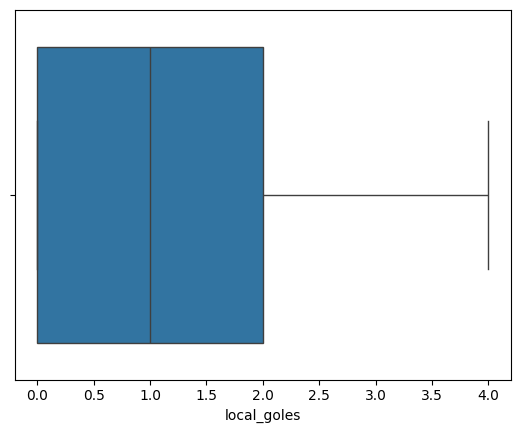

In [ ]:
sns.boxplot(x='local_goles', data=datasetlimpio)
plt.show()
# Realiza boxplot de la columna numérica elegida del Dataset

In [ ]:
fig = px.box(datasetlimpio, x="local_goles")
fig.show()

Estos códigos (*sns.boxplot(x='local_goles', data=dataset)* y *fig = px.box(dataset, x="local_goles") fig.show()*), permiten ver, que para la variable local_goles (goles del equipo local): la mediana es de 1 gol por partido, el 75% de los partidos convierten entre 0 y 2 goles, aunque la cantidad varía entre 0 y 4.

## Exploración estadística categórica

### Exploración numérica

In [ ]:
datasetlimpio['local'].value_counts()
# Cuenta las apariciones de la columna elegida del Dataset

,count
local,
Gimnasia ELP,40
Defensa y Just,33
Tucumán,32
Godoy Cruz,31
CA Unión,31
Estudiantes,31
Lanús,31
Newell's OB,30
CA Huracán,29


Este código *dataset['local'].value_counts()* permitió saber cuántos partidos jugó cada equipo al contar sus apariciones. Al ver que no todos tienen la misma cantidad, se analiza que puede tener que ver con los torneos que jugó, es decir, las veces que estuvo en la primera categoría, con partidos suspendidos, o modificaciones en la cantidad de fechas de los torneos.

### Exploración visual univariado

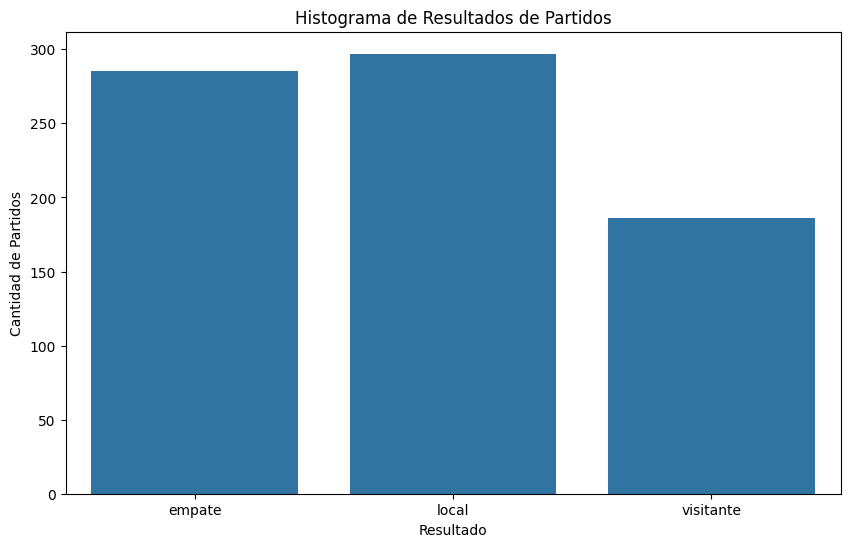

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='resultado', data=datasetlimpio)
plt.title('Histograma de Resultados de Partidos')
plt.xlabel('Resultado')
plt.ylabel('Cantidad de Partidos')
plt.show()

Para el gráfico anterior, se observa que la mayoría de partidos son ganados por los equipos locales, en menor medida se dan empates, y en la menor cantidad de casos, los gana el equipo visitante. Esto refleja que más adelante, la condición de localía, probablemente influya en el resultado.

In [ ]:
resultados = datasetlimpio['resultado'].value_counts()

fig = px.pie(values=resultados.values, names=resultados.index,
             title='Proporción de resultados de partidos')
fig.show()

El gráfico de torta, es otra manera de ver la distribución de los resultados, tal como el histograma anterior.

### Exploración visual multivariado

In [ ]:
local_wins = datasetlimpio[datasetlimpio['resultado'] == 'local'].groupby('local')['resultado'].count().reset_index(name='Triunfos')
local_wins = local_wins.sort_values(by='Triunfos', ascending=False).head(10)

fig = px.bar(local_wins, x='local', y='Triunfos', title='Top 10 equipos con más triunfos de local')
fig.update_layout(xaxis_title='Equipo Local', yaxis_title='Cantidad de triunfos')
fig.show()

Con este gráfico, se ve qué equipos triunfaron más jugando como local. Talleres, es el primero, con 16 partidos de local ganados, sobre 26 partidos jugados, como se vio en el *value.counts()* anterior. Y Lanús es el menos ganador, con poco menos de 14 partidos ganados en esa condición.

# Modelado

## Feature encoding

In [ ]:
non_numeric_cols = datasetlimpio.select_dtypes(exclude=['number']).columns
non_numeric_cols
# Selecciona las columnas no numéricas (categóricas)

Index(['temporada', 'local', 'visitante', 'arbitro', 'resultado'], dtype='object')

In [ ]:
label_encoder_temporada = LabelEncoder()
datasetlimpio['temporada_encoded'] = label_encoder_temporada.fit_transform(datasetlimpio['temporada'])
print(datasetlimpio[['temporada', 'temporada_encoded']])

     temporada  temporada_encoded
0    2016-2017                  0
1    2016-2017                  0
2    2016-2017                  0
3    2016-2017                  0
4    2016-2017                  0
..         ...                ...
763       2022                  5
764       2022                  5
765       2022                  5
766       2022                  5
767       2022                  5

[768 rows x 2 columns]


In [ ]:
label_encoder_local = LabelEncoder()
datasetlimpio['local_encoded'] = label_encoder_local.fit_transform(datasetlimpio['local'])
print(datasetlimpio[['local', 'local_encoded']])

              local  local_encoded
0      Rosario Cent             26
1        Godoy Cruz             16
2             Tigre             33
3          CA Unión              8
4       River Plate             25
..              ...            ...
763     San Lorenzo             27
764  Argentinos Jun              1
765        Banfield              3
766        Talleres             31
767        Platense             21

[768 rows x 2 columns]


In [ ]:
label_encoder_visitante = LabelEncoder()
datasetlimpio['visitante_encoded'] = label_encoder_visitante.fit_transform(datasetlimpio['visitante'])
print(datasetlimpio[['visitante', 'visitante_encoded']])

          visitante  visitante_encoded
0    Defensa y Just                 13
1        CA Huracán                  7
2       Estudiantes                 14
3       Club Olimpo                 11
4          Banfield                  3
..              ...                ...
763        Aldosivi                  0
764     Vélez Sarsf                 35
765       Sarmiento                 30
766    Gimnasia ELP                 15
767           Lanús                 18

[768 rows x 2 columns]


In [ ]:
label_encoder_arbitro = LabelEncoder()
datasetlimpio['arbitro_encoded'] = label_encoder_arbitro.fit_transform(datasetlimpio['arbitro'])
print(datasetlimpio[['arbitro', 'arbitro_encoded']])

                arbitro  arbitro_encoded
0        Mauro Vigliano               24
1      Federico Beligoy                9
2         Darío Herrera                5
3      Mariano González               23
4    Fernando Rapallini               12
..                  ...              ...
763         Ariel Penel                1
764       Facundo Tello                8
765       Pablo Giménez               31
766    Nicolás Lamolina               27
767       Néstor Pitana               28

[768 rows x 2 columns]


In [ ]:
mapping = {'local': 0, 'empate': 1, 'visitante': 2}
datasetlimpio['resultado_encoded'] = datasetlimpio['resultado'].map(mapping)
print(datasetlimpio[['resultado', 'resultado_encoded']])

     resultado  resultado_encoded
0       empate                  1
1        local                  0
2    visitante                  2
3        local                  0
4        local                  0
..         ...                ...
763      local                  0
764      local                  0
765     empate                  1
766      local                  0
767     empate                  1

[768 rows x 2 columns]


In [ ]:
datasetfinal = datasetlimpio.drop(columns=non_numeric_cols)

In [ ]:
datasetfinal

,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,local_goles_penal,local_penales,local_disparos,local_disparos_puerta,local_amarillas,...,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,visitante_goles_contra,temporada_encoded,local_encoded,visitante_encoded,arbitro_encoded,resultado_encoded
0,0.64,0.36,0,0,0,0,0,20,6,1,...,1,8,26,26,0,0,26,13,24,1
1,0.39,0.61,1,0,1,0,0,11,4,3,...,3,16,17,19,0,0,16,7,9,0
2,0.39,0.62,0,3,0,0,0,13,4,2,...,0,23,18,18,0,0,33,14,5,2
3,0.45,0.55,1,0,1,0,0,4,1,4,...,4,17,22,18,0,0,8,11,23,0
4,0.71,0.29,4,1,1,0,0,11,7,0,...,2,10,17,20,0,0,25,3,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.49,0.51,3,0,2,0,0,13,5,1,...,0,6,10,11,0,5,27,0,1,0
764,0.47,0.53,2,0,2,0,0,12,4,3,...,1,21,16,14,0,5,1,35,8,0
765,0.60,0.40,0,0,0,0,0,7,1,3,...,1,15,11,11,0,5,3,30,31,1
766,0.53,0.47,2,1,2,0,0,10,6,4,...,1,17,12,12,0,5,31,15,27,0


## Feature selection

Primero, se separa el dataset para distinguir entre la variable target (objetivo a predecir o inferir) y el resto de variables dato.

In [ ]:
X = datasetfinal.drop(columns=['resultado_encoded'])
y = datasetfinal['resultado_encoded']
# Se divide entre variable target y variable a predecir

Se evalúa la existencia de features o variables constantes, ya que podrían atentar con la optimización del procesamiento del dataset, si se tienen en cuenta valores sin variabilidad.

In [ ]:
constant_filter = VarianceThreshold(threshold=0)

In [ ]:
constant_filter.fit(X)

VarianceThreshold(threshold=0)

In [ ]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

print(len(constant_columns))

8


In [ ]:
datasetfinal = datasetfinal.drop(columns=constant_columns)

Una vez obtenido el datasetfinal sin las columnas de valores constantes, se analiza la correlación entre las variables dato y la variable target.

#### Pearson

In [ ]:
correlacion_pearson = datasetfinal.corr(method='pearson')

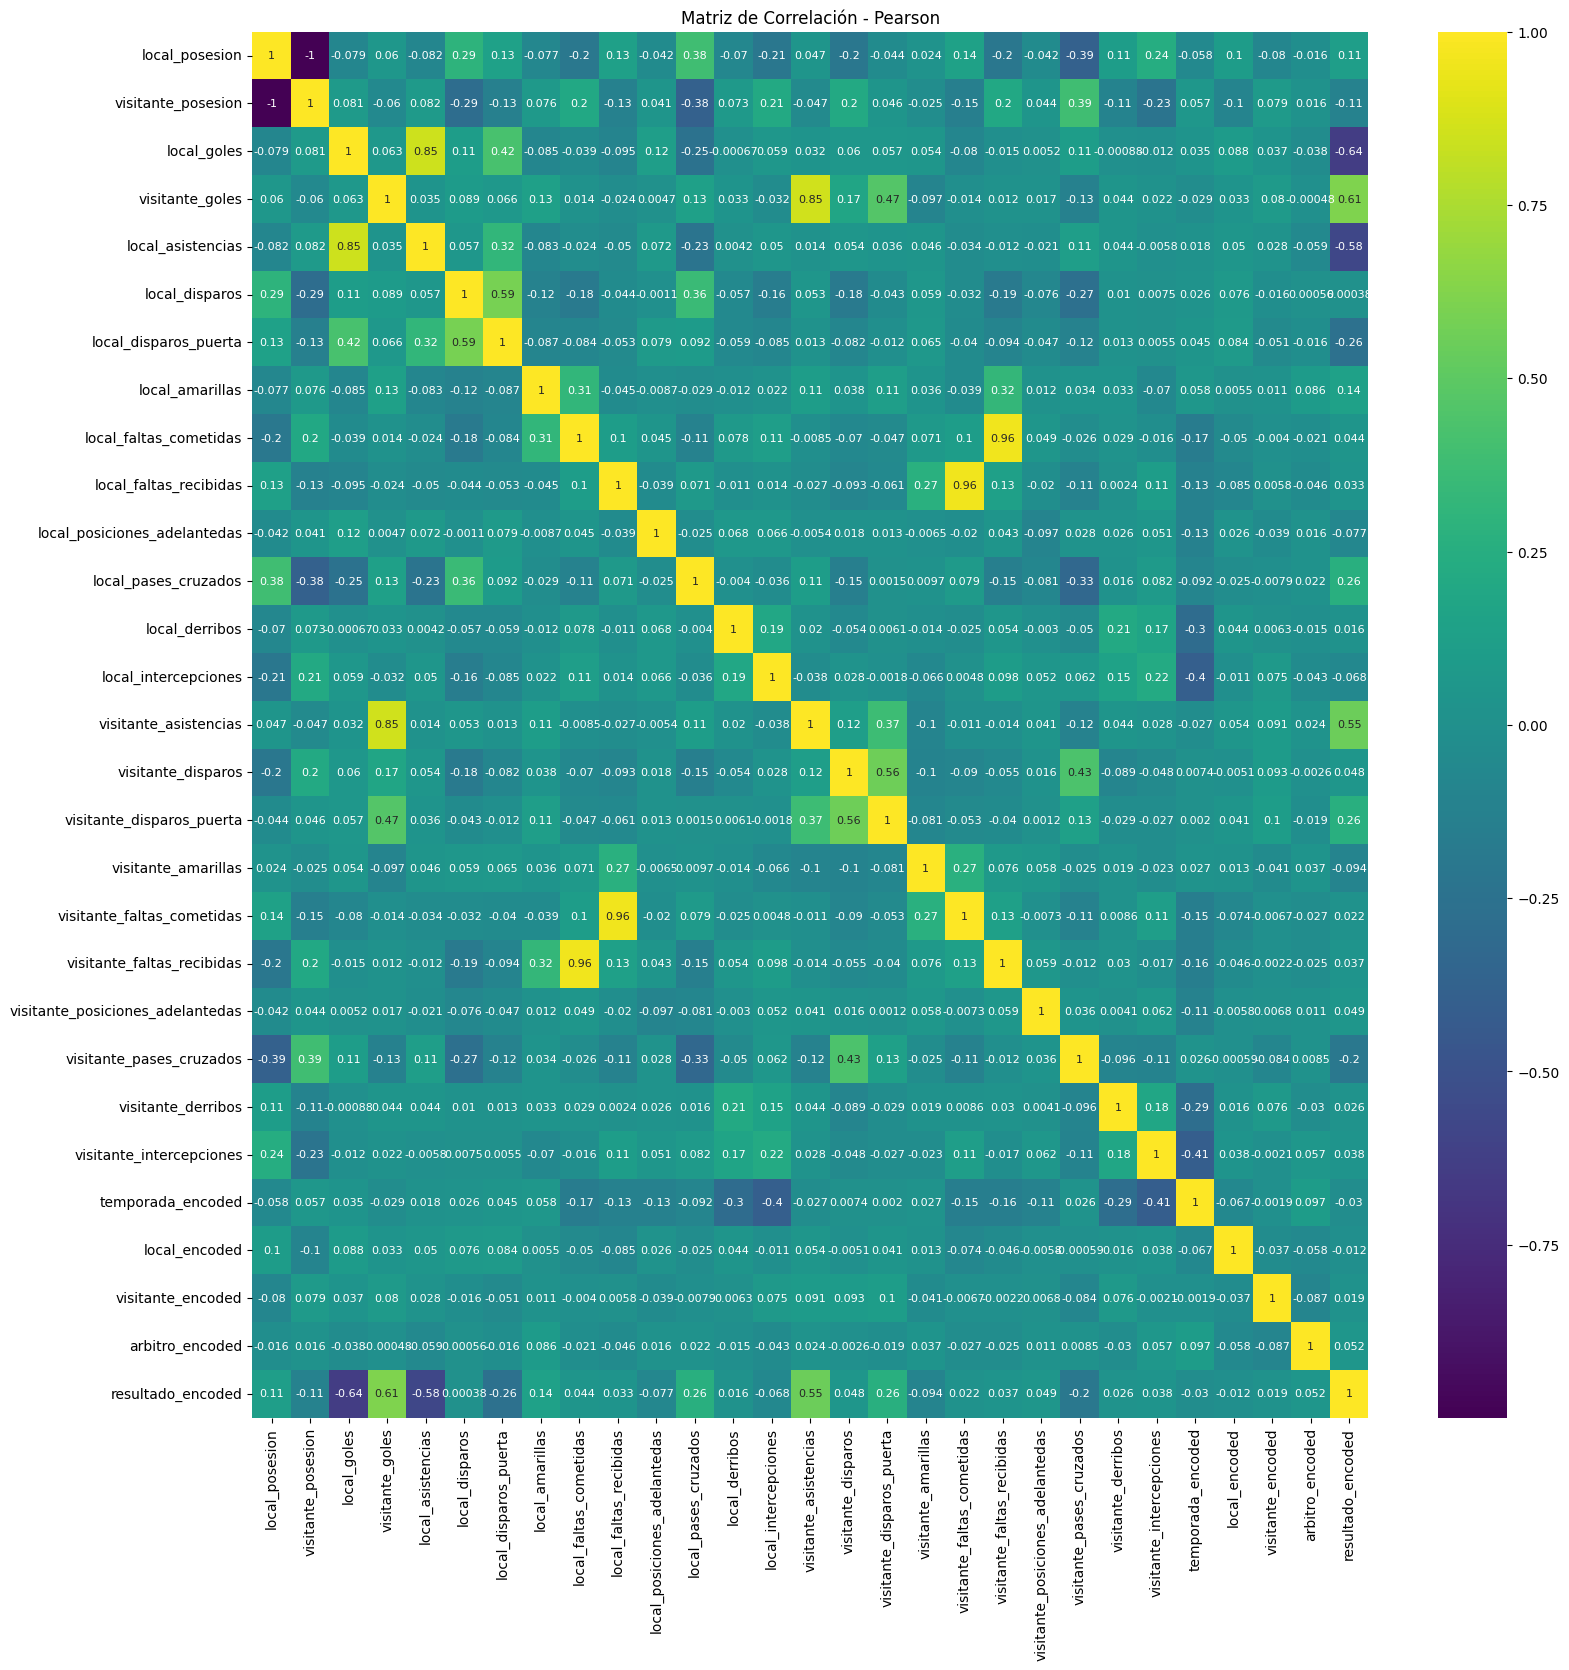

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(correlacion_pearson , annot=True, cmap="viridis",annot_kws={"size":8})
plt.title('Matriz de Correlación - Pearson')
plt.show()

In [ ]:
correlacion_pearson

,local_posesion,visitante_posesion,local_goles,visitante_goles,local_asistencias,local_disparos,local_disparos_puerta,local_amarillas,local_faltas_cometidas,local_faltas_recibidas,...,visitante_faltas_recibidas,visitante_posiciones_adelantedas,visitante_pases_cruzados,visitante_derribos,visitante_intercepciones,temporada_encoded,local_encoded,visitante_encoded,arbitro_encoded,resultado_encoded
local_posesion,1.000000,-0.999550,-0.079494,0.059558,-0.081678,0.289417,0.133323,-0.076891,-0.199595,0.127673,...,-0.204211,-0.042163,-0.389580,0.107257,0.235247,-0.058333,0.101242,-0.079695,-0.016258,0.112480
visitante_posesion,-0.999550,1.000000,0.080608,-0.059672,0.081849,-0.289279,-0.134706,0.075730,0.198316,-0.130407,...,0.202939,0.044195,0.390329,-0.108847,-0.232802,0.056599,-0.100991,0.079163,0.015674,-0.113005
local_goles,-0.079494,0.080608,1.000000,0.063256,0.847693,0.107160,0.416064,-0.084858,-0.039317,-0.095137,...,-0.014868,0.005183,0.106569,-0.000881,-0.011855,0.034564,0.087687,0.036536,-0.038170,-0.644403
visitante_goles,0.059558,-0.059672,0.063256,1.000000,0.034628,0.088898,0.065635,0.132742,0.014249,-0.024224,...,0.012280,0.017292,-0.129320,0.044112,0.021905,-0.028791,0.033385,0.079970,-0.000475,0.610492
local_asistencias,-0.081678,0.081849,0.847693,0.034628,1.000000,0.056935,0.320233,-0.082607,-0.023748,-0.050204,...,-0.011597,-0.021151,0.110502,0.044250,-0.005831,0.017572,0.049819,0.027757,-0.058785,-0.577620
local_disparos,0.289417,-0.289279,0.107160,0.088898,0.056935,1.000000,0.590463,-0.115044,-0.179787,-0.044317,...,-0.185955,-0.075917,-0.271618,0.010090,0.007484,0.025992,0.076326,-0.016058,0.000558,0.000384
local_disparos_puerta,0.133323,-0.134706,0.416064,0.065635,0.320233,0.590463,1.000000,-0.087407,-0.084371,-0.052692,...,-0.093943,-0.046510,-0.116709,0.013353,0.005519,0.045289,0.083560,-0.051279,-0.015677,-0.259194
local_amarillas,-0.076891,0.075730,-0.084858,0.132742,-0.082607,-0.115044,-0.087407,1.000000,0.313330,-0.044771,...,0.324554,0.011864,0.034271,0.032656,-0.069767,0.058202,0.005475,0.011282,0.086370,0.140629
local_faltas_cometidas,-0.199595,0.198316,-0.039317,0.014249,-0.023748,-0.179787,-0.084371,0.313330,1.000000,0.103475,...,0.957786,0.049064,-0.026290,0.029022,-0.015830,-0.166625,-0.050130,-0.004032,-0.021087,0.044395
local_faltas_recibidas,0.127673,-0.130407,-0.095137,-0.024224,-0.050204,-0.044317,-0.052692,-0.044771,0.103475,1.000000,...,0.129474,-0.019505,-0.110621,0.002424,0.105494,-0.131771,-0.084783,0.005792,-0.046366,0.032992


In [ ]:
umbral_correlacion = 0.1
correlacion_target = correlacion_pearson['resultado_encoded']
caracteristicas_seleccionadas = correlacion_target[correlacion_target.abs() > umbral_correlacion].index

print("Características seleccionadas con correlación mayor a 0.1 con respecto a 'resultado':")
print(caracteristicas_seleccionadas)
# Selecciona los atributos con coeficientes de correlación mayores a 0.1 con respecto a la variable target

Características seleccionadas con correlación mayor a 0.1 con respecto a 'resultado':
Index(['local_posesion', 'visitante_posesion', 'local_goles',
       'visitante_goles', 'local_asistencias', 'local_disparos_puerta',
       'local_amarillas', 'local_pases_cruzados', 'visitante_asistencias',
       'visitante_disparos_puerta', 'visitante_pases_cruzados',
       'resultado_encoded'],
      dtype='object')


#### Spearman

In [ ]:
correlacion_spearman = datasetfinal.corr(method='spearman')

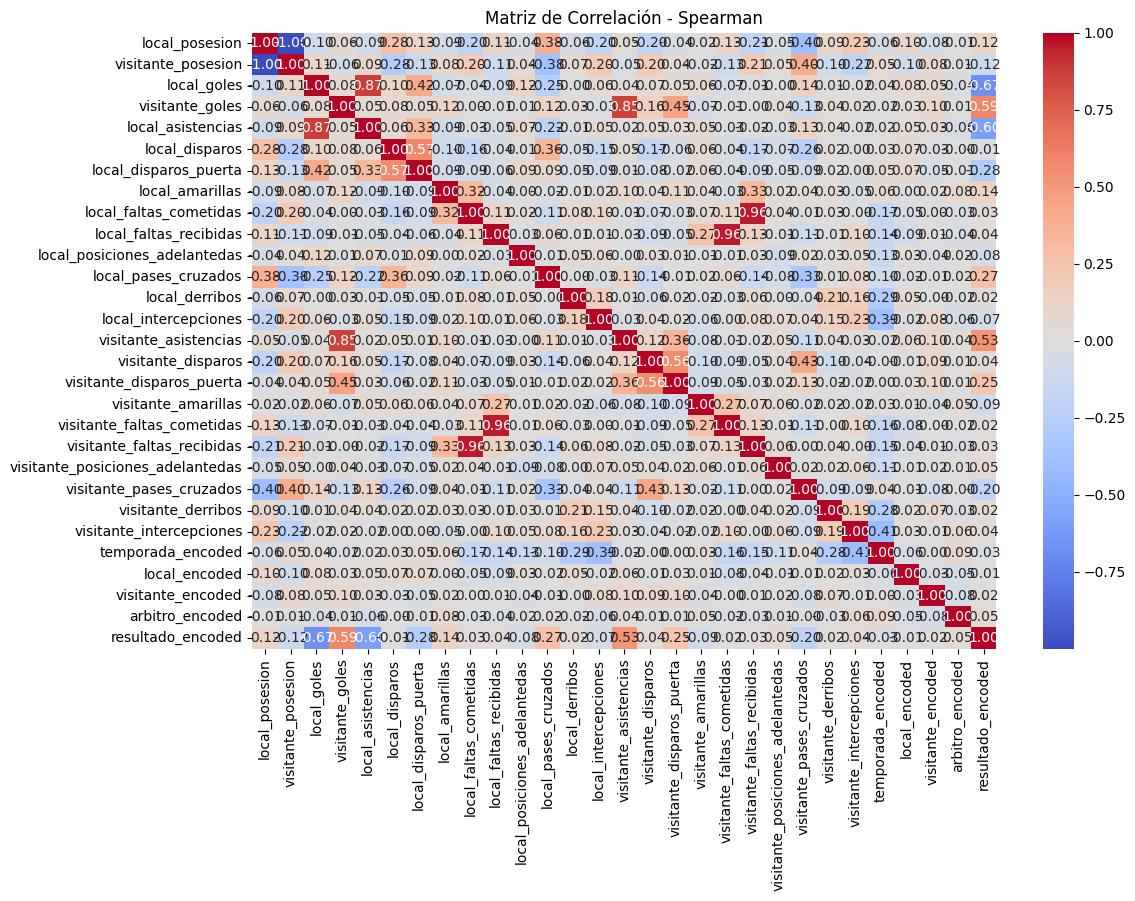

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Spearman')
plt.show()

In [ ]:
umbral_correlacion = 0.1
correlacion_target = correlacion_spearman['resultado_encoded']
caracteristicas_seleccionadas = correlacion_target[correlacion_target.abs() > umbral_correlacion].index

print("Características seleccionadas con correlación mayor a 0.1 con respecto a 'target':")
print(caracteristicas_seleccionadas)

Características seleccionadas con correlación mayor a 0.1 con respecto a 'target':
Index(['local_posesion', 'visitante_posesion', 'local_goles',
       'visitante_goles', 'local_asistencias', 'local_disparos_puerta',
       'local_amarillas', 'local_pases_cruzados', 'visitante_asistencias',
       'visitante_disparos_puerta', 'visitante_pases_cruzados',
       'resultado_encoded'],
      dtype='object')


#### Information Gain

In [ ]:
X = datasetfinal.drop(columns=['resultado_encoded'])
y = datasetfinal['resultado_encoded']

information_gains = mutual_info_regression(X, y)

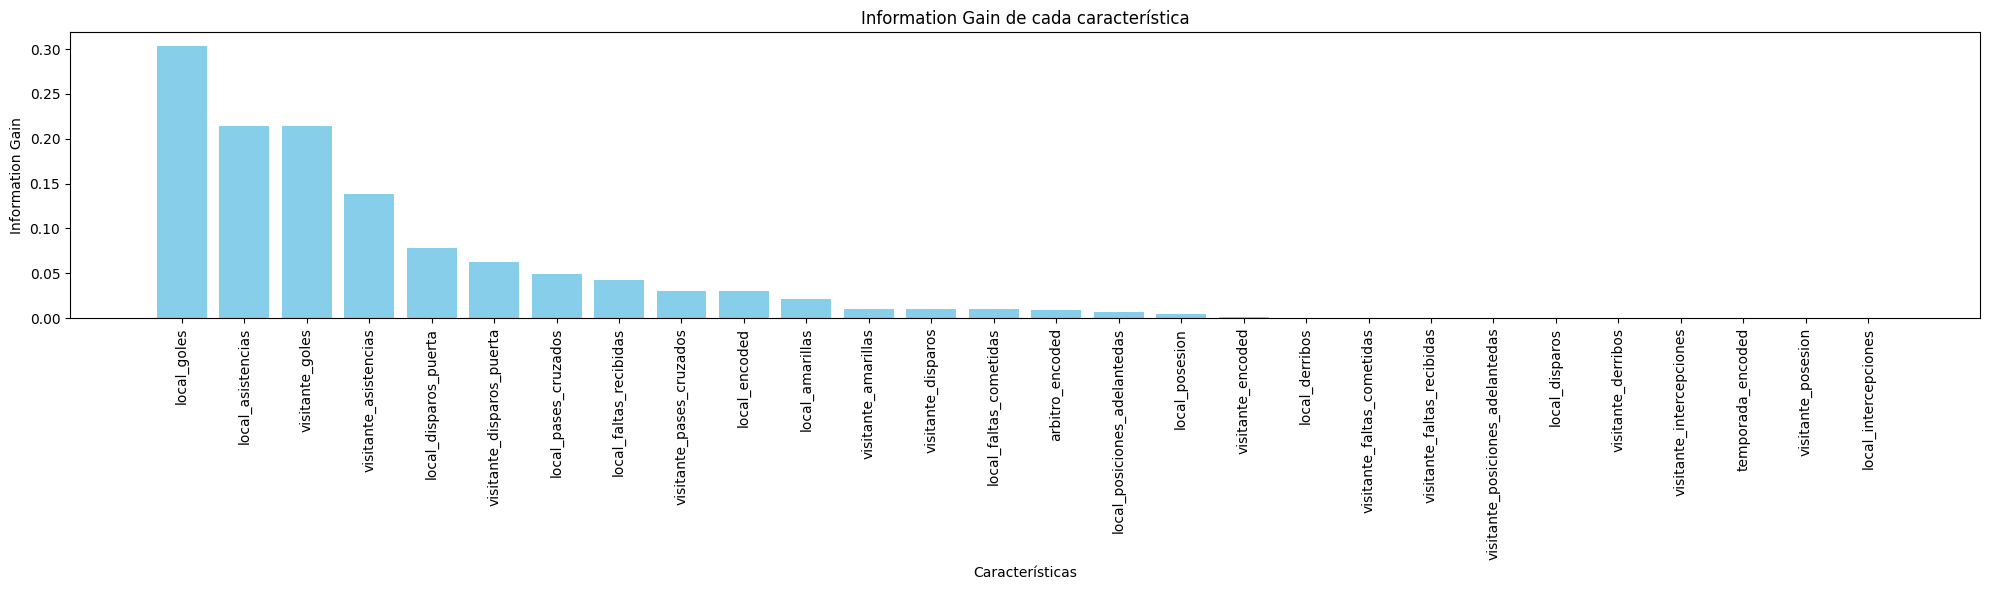

In [ ]:
indices_ordenados = np.argsort(information_gains)[::-1]
# Obtiene los índices ordenados por Information Gain en orden descendente

information_gains_ordenados = information_gains[indices_ordenados]
# Ordena los Information Gain en el mismo orden

nombres_caracteristicas_ordenados = X.columns[indices_ordenados]
# Ordena el nombre de las características en el mismo orden

plt.figure(figsize=(20, 6))
plt.bar(range(len(information_gains_ordenados)), information_gains_ordenados, color='skyblue')
plt.xlabel('Características')
plt.ylabel('Information Gain')
plt.title('Information Gain de cada característica')
plt.xticks(np.arange(len(information_gains_ordenados)), nombres_caracteristicas_ordenados, rotation=90)
plt.tight_layout()
plt.show()
# Crea un gráfico de barras para visualizar los Information Gain

In [ ]:
umbral = 0.05
caracteristicas_seleccionadas = X.columns[information_gains > umbral]

In [ ]:
datafinal = datasetfinal[caracteristicas_seleccionadas]

In [ ]:
datafinal.columns

Index(['local_goles', 'visitante_goles', 'local_asistencias',
       'local_disparos_puerta', 'visitante_asistencias',
       'visitante_disparos_puerta'],
      dtype='object')

## Machine Learning (automatizado)

Al tratarse de una predicción sobre variable categórica (resultado: local, empate, visitante), se aplicará Regresión Logística basandose en Information Gain.

In [ ]:
X = datafinal
y = datasetfinal['resultado_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Se dividen los datos de entrenamiento y testeo

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Se aplica y entrena el modelo

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')
# Se calcula la precisión de los cálculos y funcionamiento del modelo

Precisión del modelo: 100.00%


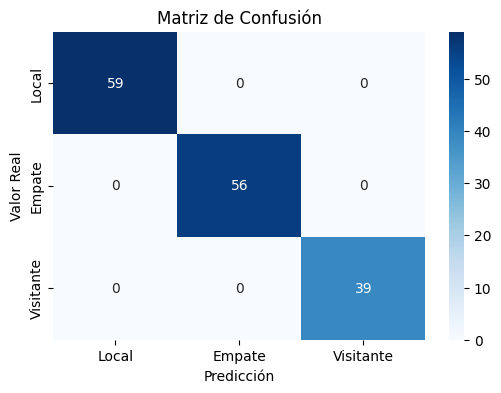

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Local', 'Empate', 'Visitante'],
            yticklabels=['Local', 'Empate', 'Visitante'])
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión")
plt.show()

# Resultado y conclusiones

A lo largo del proyecto se buscó generar un modelo de predicciones e inferencias sobre qué aspectos pueden relacionarse en mayor medida con las victorias de los equipos en partidos de fútbol, basandose en los ya concretados.

Se implementó un Dataset provisto por *Kaggle*, de la Liga Profesional 2016-2022, y se desarrollaron las siguientes etapas:
* Procesos de limpieza: incluyendo eliminación de columnas no relevantes, manejo de datos duplicados, cambio de formatos para mantener la consistencia al momento de relacionar y calcular entre los valores, manejo de datos nulos o faltantes, y outliers que pudieran sesgar la muestra.
* Exploración y visualización: en esta sección se implementaron distintas bibliotecas de Python (Matplotlib, Plotly, Seaborn, ScikitLearn) para añadir y demostrar distintos cálculos y hallazgos relevantes sobre los ejemplares cargados en el Dataset, por medio de gráficos de distintos tipos y haciendo relaciones entre las características.
* Modelado: dentro del mismo, se comenzó transformando los valores categóricos en numéricos para permitir su vinculación y comparación (Feature Encoding), luego se hizo selección de las columnas más relevantes a la variable a predecir/variable target a través de distintoss métodos como Pearson, Spearman e Information Gain (Feature Selection). Finalmente, se eligió este último, ya que es más aplicable a variables categóricas como target. Además, se generó el procedimiento de aprendizaje automatizado, en el que seleccionando esas variables más relacionadas al objetivo a predecir, se realizaron prácticas de proyección.